In [43]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [44]:
df= pd.read_excel("cars (1).xls")

In [45]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [46]:
x= df[["Price","Mileage","Cylinder"]]

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [48]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [49]:
model =KMeans(4)

In [50]:
model = model.fit(x)

In [51]:
pred = model.predict(x)

In [52]:
pred

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2,
       2, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1,
       1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1,
       3, 3, 3, 3, 2, 2, 2, 2, 0, 1, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 3, 3, 2, 2, 2, 2, 1, 1,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1,
       3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2,
       2, 1, 1, 1, 1, 1, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 3, 3, 2, 2, 1, 1, 1, 1,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2,

In [53]:
x["cluster"]= pred
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,2
1,17542.036083,9135,6,2
2,16218.847862,13196,6,2
3,16336.913140,16342,6,1
4,16339.170324,19832,6,1


In [54]:
silhouette_score(x,pred)

0.338198021966827

In [55]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'price')

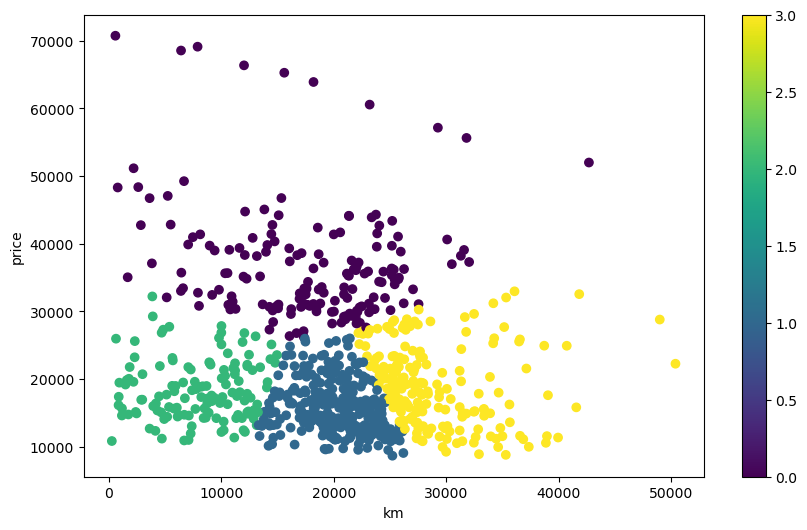

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage,x.Price,c=pred)
plt.colorbar()
plt.xlabel("km")
plt.ylabel("price")

In [57]:
# gruplarından merkezinden olan uzaklıkları kullanmak için wcss
wcss=[]
ss =[]
for i in range(2,10):
    model=KMeans(i)
    model = model.fit(x)
    pred = model.predict(x)
    ss1 = silhouette_score(x,pred)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)


0.4515070147366399
0.41264496333095435
0.338198021966827
0.39726870935686803
0.34735453330206406
0.3621361141513779
0.3383148543382874
0.34847845302151764


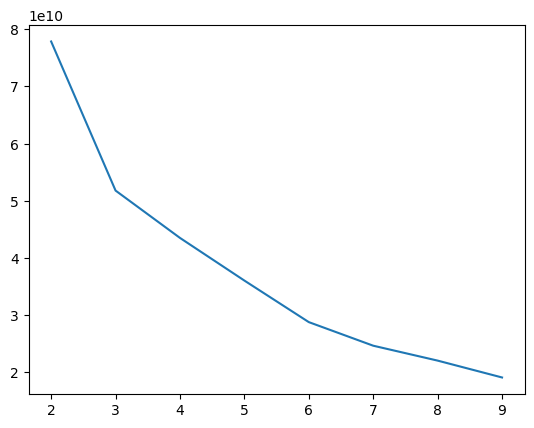

In [58]:
plt.plot (range(2,10),wcss)

In [59]:
import seaborn as sns

<Axes: >

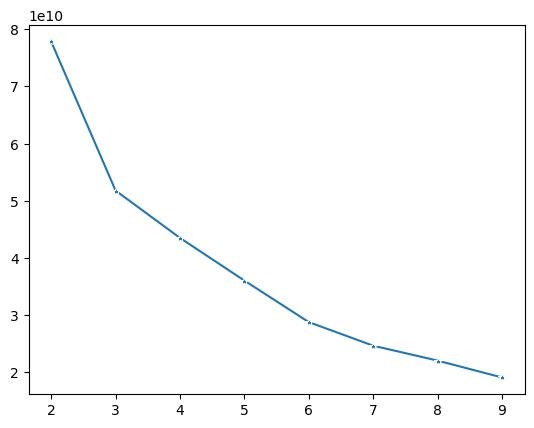

In [60]:
sns.lineplot(x= range(2,10),y=wcss,marker="*")

In [61]:
pip install yellowbrick

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/282.6 kB 435.7 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/282.6 kB 465.5 kB/s eta 0:00:01
   --------------- ---------------------- 112.6/282.6 kB 726.2 kB/s eta 0:00:01
   -------------------------- ----------- 194.6/282.6 kB 903.5 kB/s eta 0:00:01
   ---------------------------------- ----- 245.8/282.6 kB 1.0 MB/s eta 0:00:01
   ---------------------------------- ----- 245.8/282.6 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- 282.6/282.6 kB 870.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [62]:
from yellowbrick.cluster import KElbowVisualizer

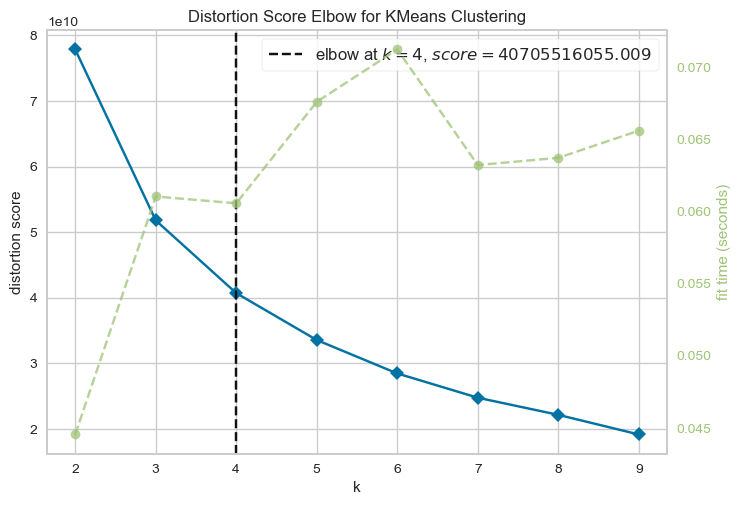

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
# en optimum nokta için
km= KMeans()
vis =KElbowVisualizer(km,k=(2,10))
vis.fit(x)
vis.show()

In [64]:
#  Hierachical clustering

In [65]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [66]:
data = linkage(x, method= "ward", metric= "euclidean")

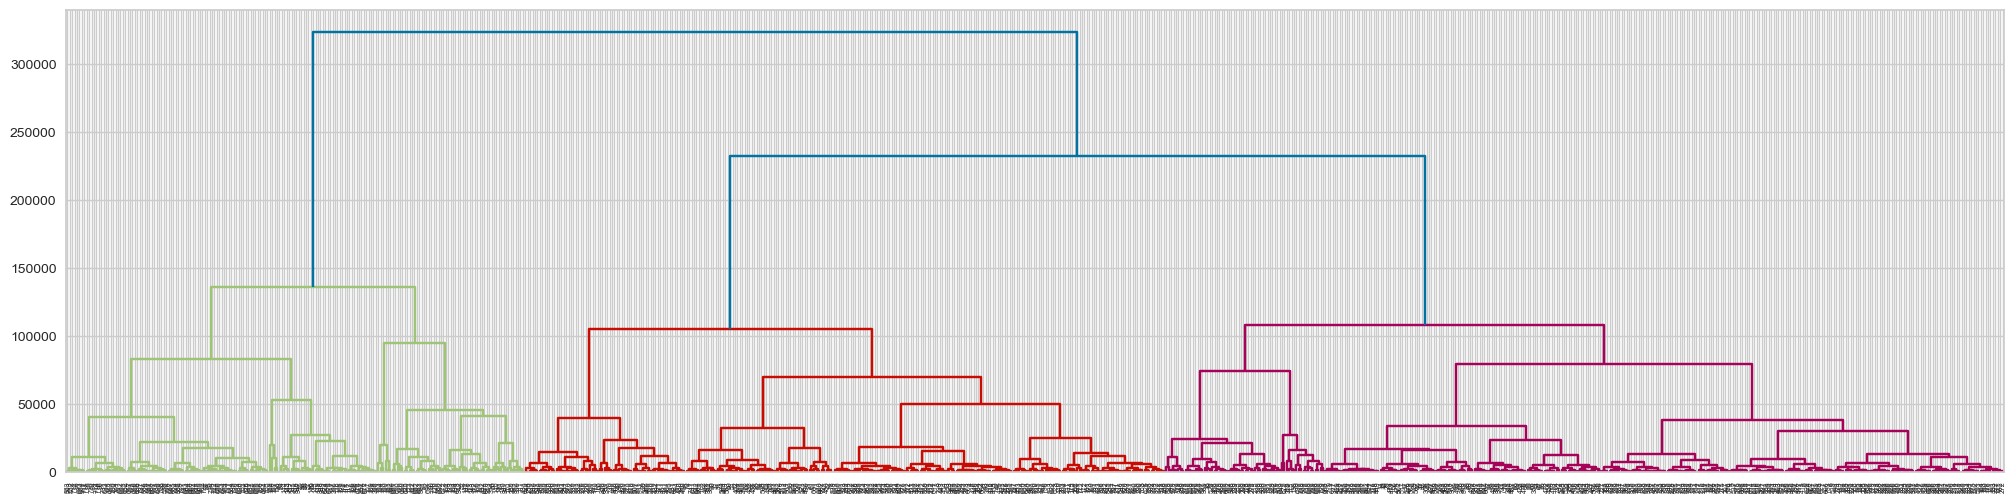

In [67]:
plt.figure(figsize=(25,6))
dendrogram(data);

In [68]:
df= pd.read_csv("Billionaires.csv")

In [69]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


<Axes: xlabel='selfMade', ylabel='count'>

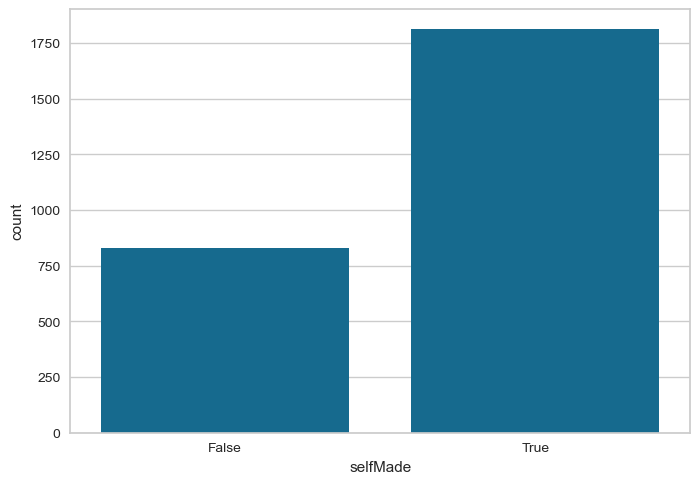

In [70]:
sns.countplot(x=df["selfMade"])

<Axes: xlabel='count', ylabel='country'>

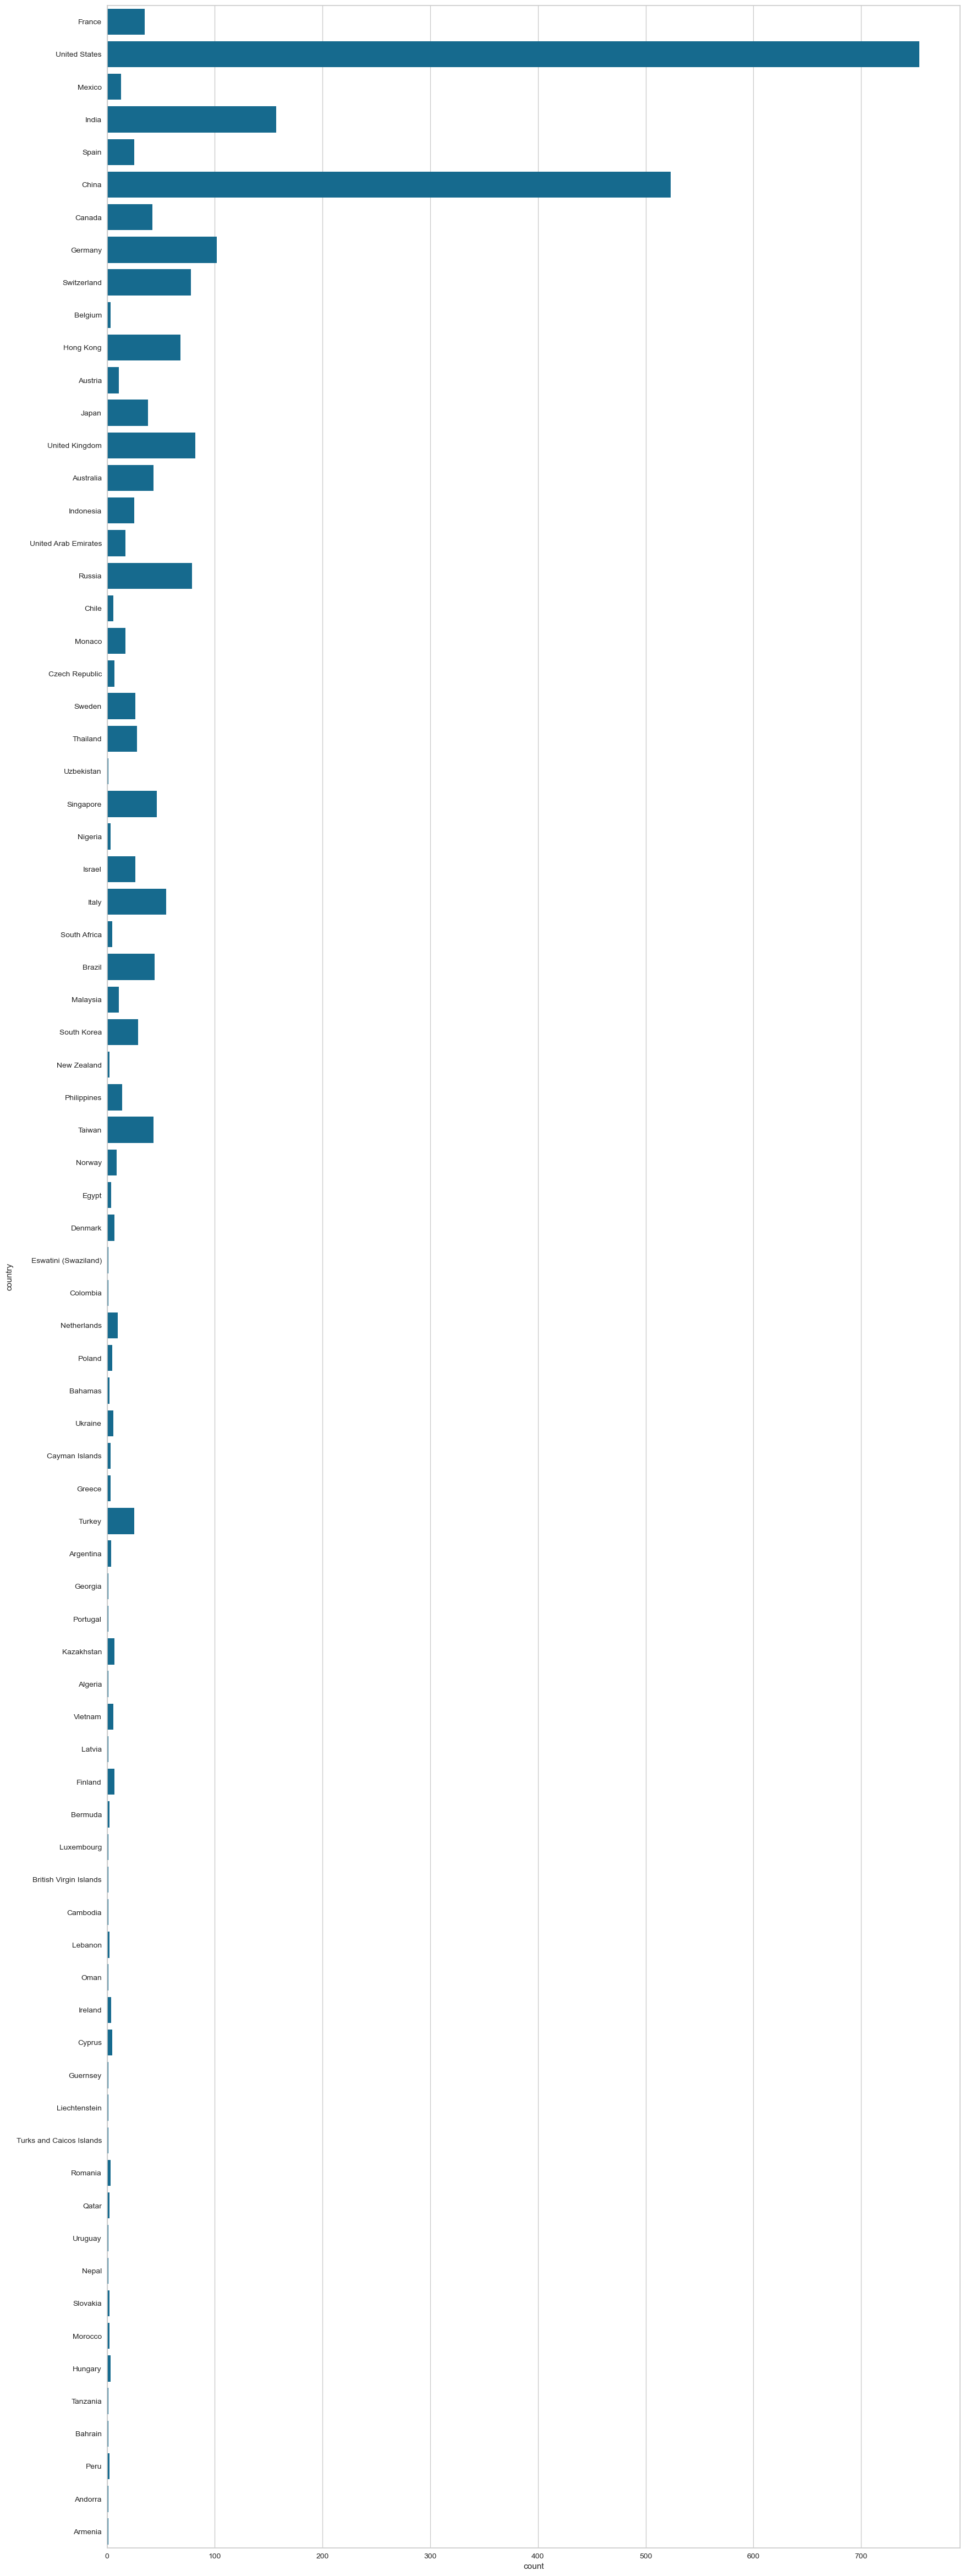

In [71]:
plt.figure(figsize=(20,60))
sns.countplot(y=df["country"])

<Axes: xlabel='count', ylabel='country'>

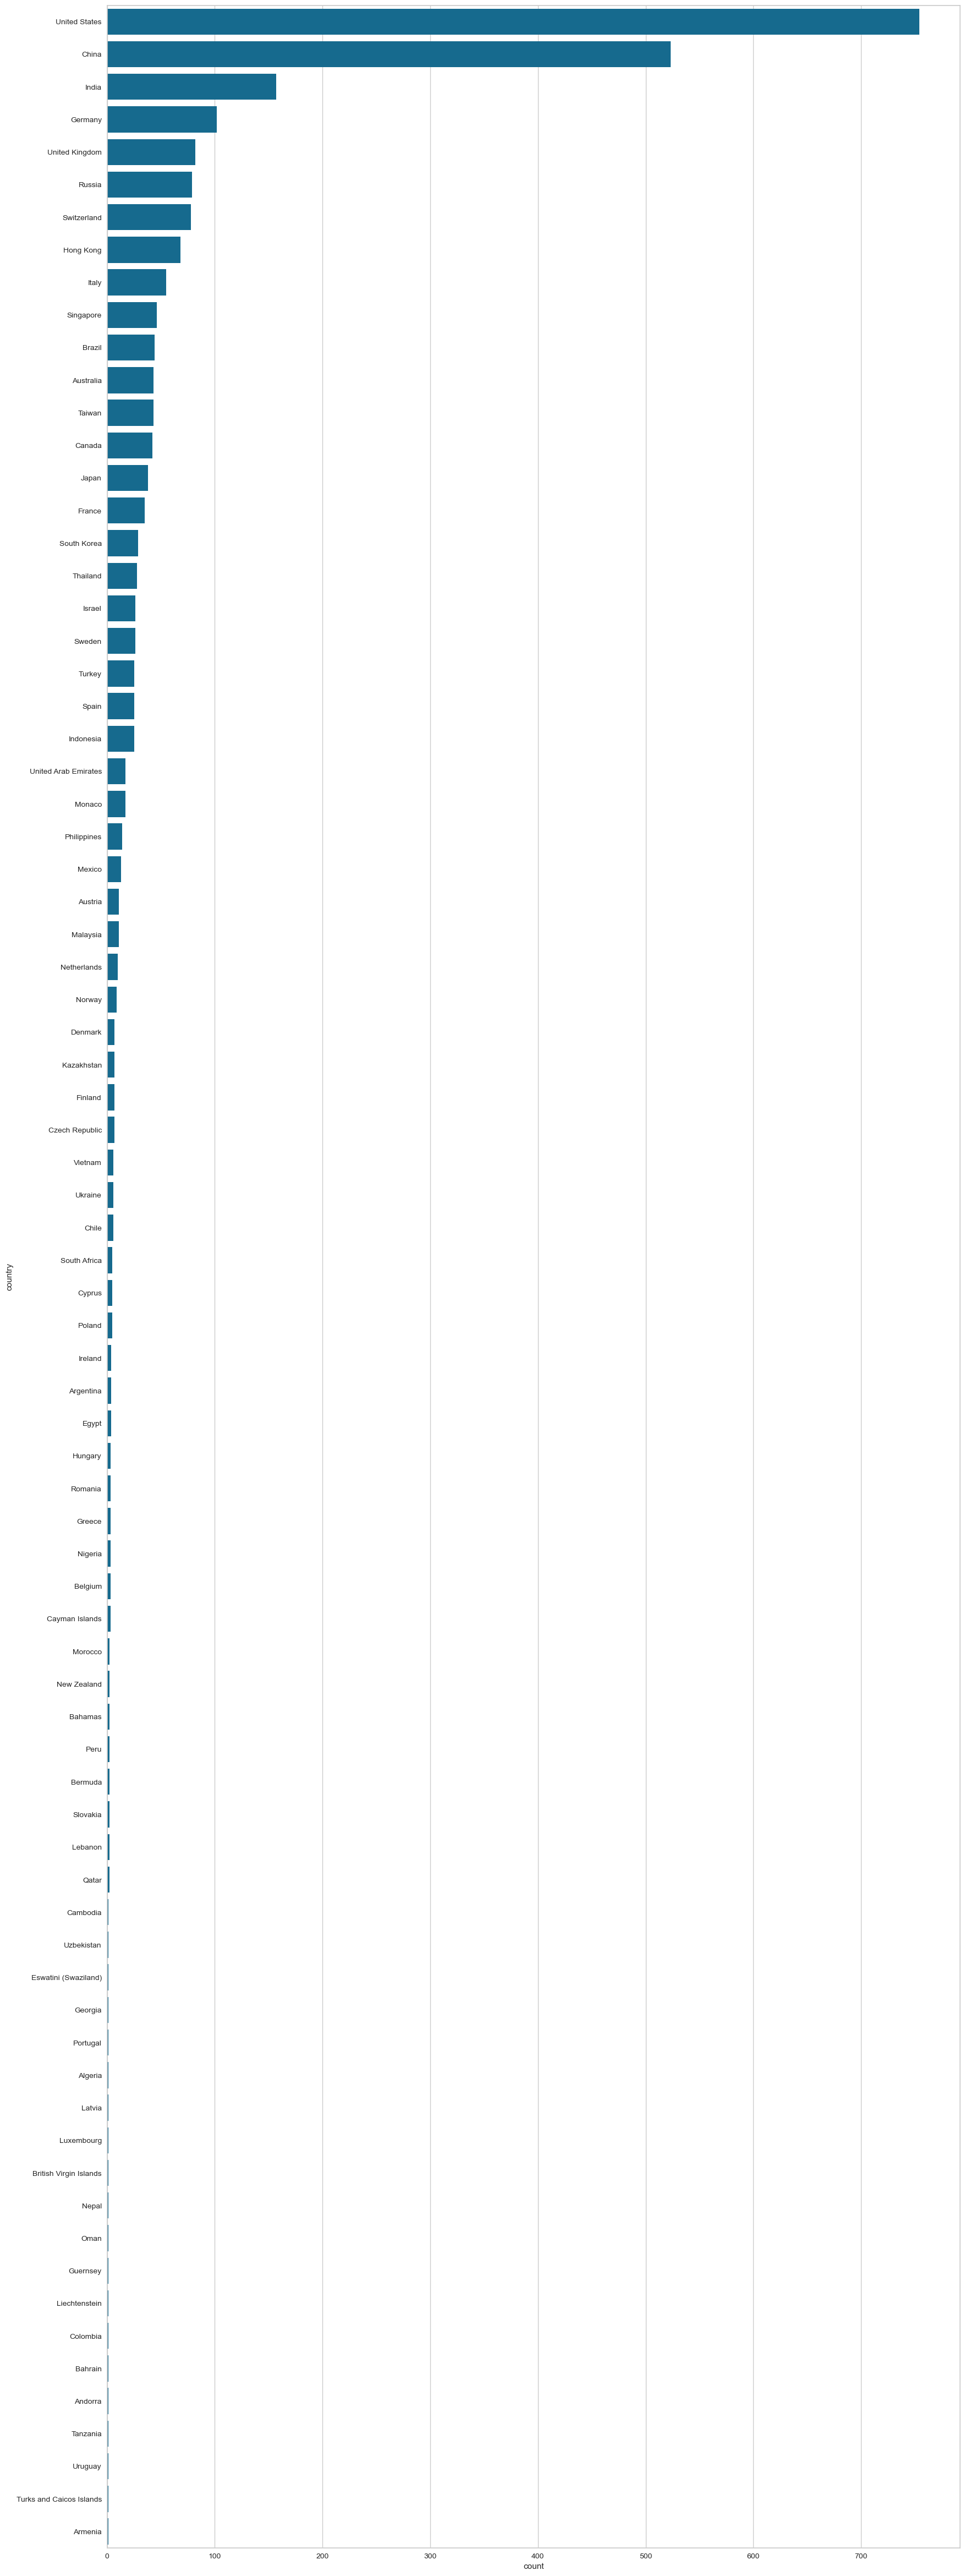

In [72]:
ydf= df["country"].value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,60))
sns.countplot(y=df["country"],order= ydf.index)

In [73]:
tr= df[df["country"]== "Turkey"]

<Axes: xlabel='selfMade', ylabel='count'>

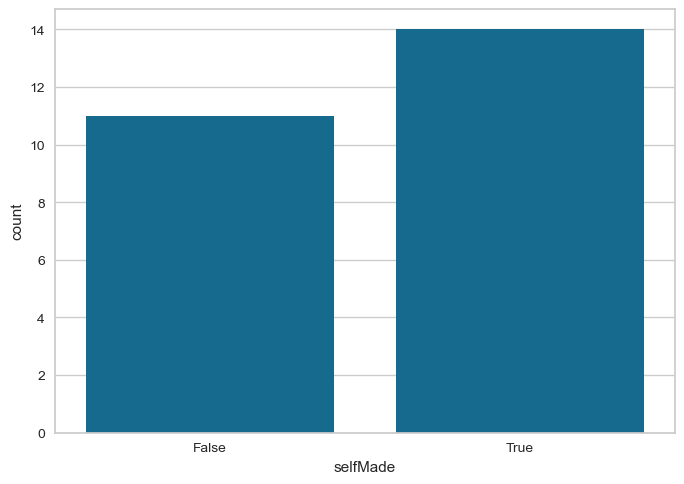

In [74]:
sns.countplot(x=tr["selfMade"])

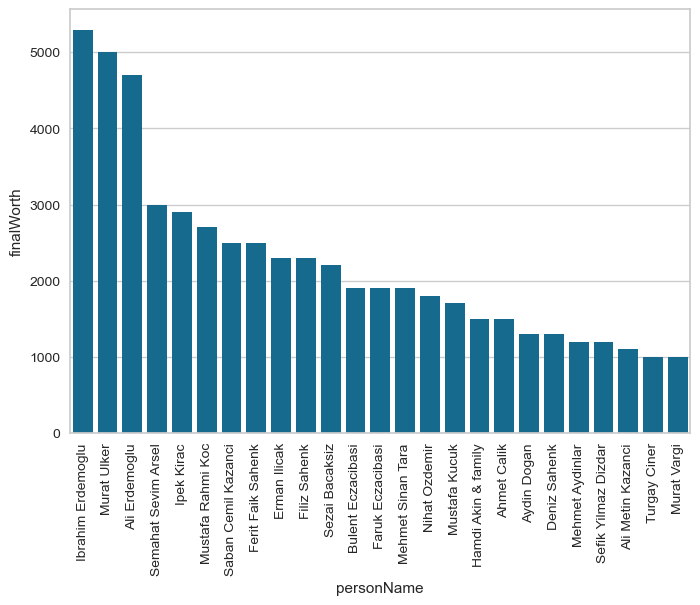

In [79]:
sns.barplot(x= tr["personName"],y=tr["finalWorth"])
plt.xticks(rotation= 90);

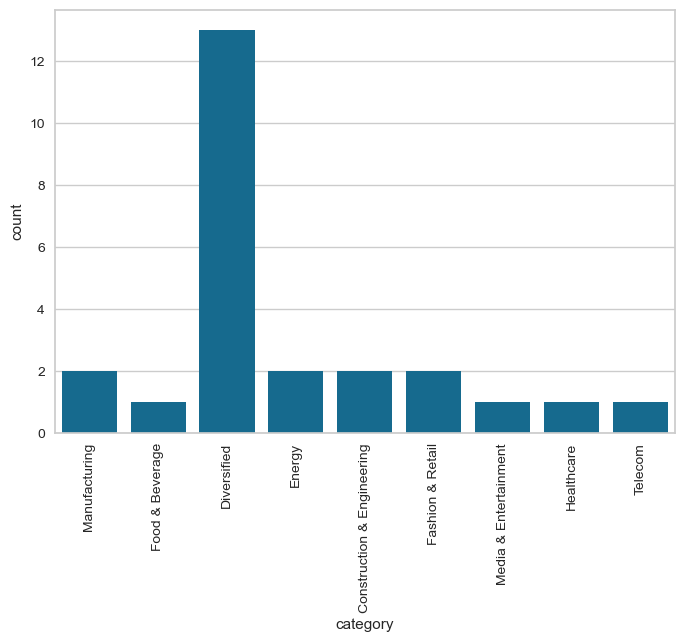

In [81]:
sns.countplot(x=tr["category"])
plt.xticks(rotation=90)
plt.show()

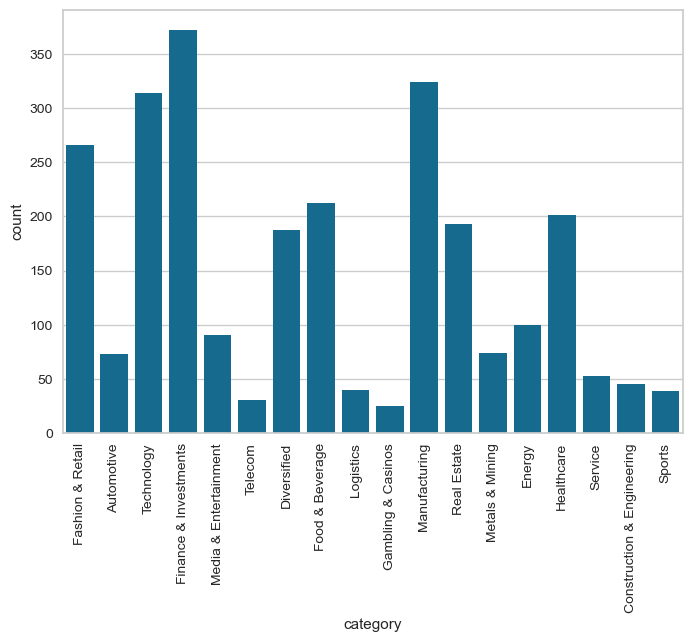

In [82]:
sns.countplot(x=df["category"])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='gender', ylabel='count'>

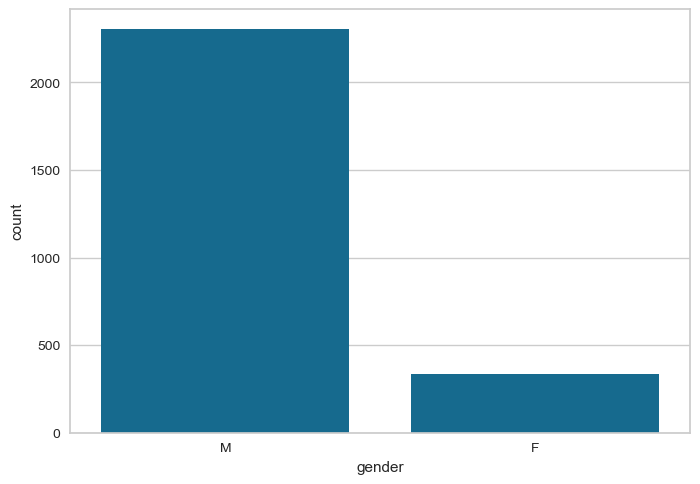

In [83]:
sns.countplot(x= df["gender"])

<Axes: xlabel='gender', ylabel='count'>

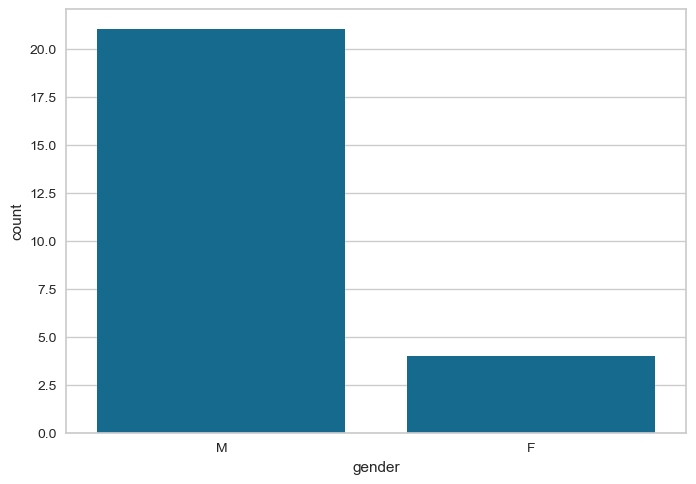

In [84]:
sns.countplot(x= tr["gender"])

In [85]:
df["gender"].value_counts()

gender
M    2303
F     337
Name: count, dtype: int64

In [86]:
tr["gender"].value_counts()

gender
M    21
F     4
Name: count, dtype: int64